<a href="https://colab.research.google.com/github/gilbert83416/NTUST-AI-Master-degree-Reference/blob/main/iris_Perceptron_Logitic_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import numpy as np  
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['ans'] = iris['target']
print(iris.target)
df

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size = 0.3, random_state = 1, stratify = iris.target)  #x[:,[2,3]] :所有集合的ith data
X_train, X_test, y_train, y_test 

(array([[1.4, 0.2],
        [1.7, 0.2],
        [5.3, 2.3],
        [5.7, 2.1],
        [1.2, 0.2],
        [5.6, 2.4],
        [6.6, 2.1],
        [1.2, 0.2],
        [5.8, 1.6],
        [4.6, 1.3],
        [3.3, 1. ],
        [3.9, 1.4],
        [1.3, 0.2],
        [4.7, 1.2],
        [4. , 1.3],
        [5.1, 1.9],
        [1.9, 0.2],
        [3.5, 1. ],
        [3.9, 1.2],
        [1.6, 0.2],
        [4.8, 1.8],
        [6.9, 2.3],
        [4.5, 1.5],
        [4.5, 1.3],
        [3.8, 1.1],
        [5.6, 2.4],
        [4.7, 1.4],
        [5.6, 1.4],
        [5.8, 2.2],
        [5.1, 2.4],
        [4.1, 1.3],
        [1.5, 0.4],
        [6.7, 2.2],
        [5. , 1.9],
        [4.8, 1.8],
        [5.6, 2.1],
        [4.2, 1.5],
        [6.7, 2. ],
        [5.5, 1.8],
        [1.6, 0.2],
        [4.9, 1.8],
        [1.4, 0.2],
        [5.1, 1.5],
        [1.9, 0.4],
        [1. , 0.2],
        [4.9, 1.5],
        [1.5, 0.2],
        [1.1, 0.1],
        [5.5, 1.8],
        [4.7, 1.5],


In [ ]:
# 特徵縮放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import Perceptron
# eta = 學習速率, random_state: 每輪processing後 reproducibility
perc = Perceptron(eta0 = 0.1, random_state=1)
perc.fit(X_train_std,y_train)

pred = perc.predict(X_test_std)
misclassified = (pred !=y_test).sum()
# check the quantity of wrong classification 
print(misclassified)

1


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
acc

0.9777777777777777

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # print(X)
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    print(x1_min, x1_max)
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # print(x2_min, x2_max)

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    c="",
                    edgecolor='black',
                    marker='o',
                    s = 100,
                    label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


2

-2.555787268814562 2.734790447233992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


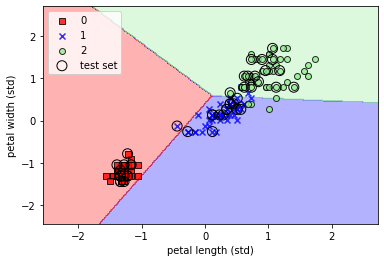

<Figure size 1008x1008 with 0 Axes>

In [ ]:
# Perceptron
import matplotlib.pyplot as plt


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print(X_combined_std.shape[1])
print()
plot_decision_regions(X = X_combined_std, 
                      y = y_combined, 
                      classifier = perc,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.figure(figsize=(14,14))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-2.555787268814562 2.734790447233992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


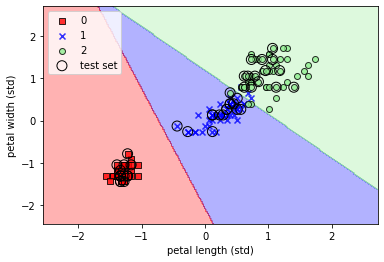

<Figure size 1008x1008 with 0 Axes>

In [ ]:
# LogisticRegression
# solver parameter: 求解參數器lbfgs: Limited memory Broyden Fletcher Goldfarb shanno(有限記憶體, 同時可處理多項式損失) Hint: C is for overfitting and regulation
from sklearn.linear_model import LogisticRegression

logistics = LogisticRegression(C=100.0, random_state =1, solver = 'lbfgs', multi_class = 'ovr')
logistics.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, 
                      y = y_combined, 
                      classifier = logistics,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.figure(figsize=(14,14))
plt.show()

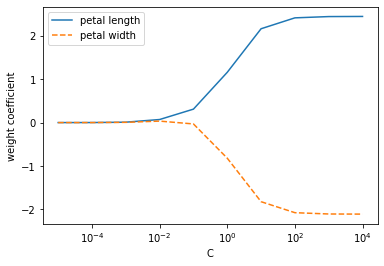

In [ ]:
# 反正規化參數C 與lenda 正規化參數的導數-> 若降低Ｃ則表示增加正規化的強度
weights, params = [], []
for c in np.arange(-5,5):
  logistics = LogisticRegression(C=10.**c, random_state =1, solver = 'lbfgs', multi_class = 'ovr')
  logistics.fit(X_train_std, y_train)
  weights.append(logistics.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],
         label= 'petal length')
plt.plot(params, weights[:, 1],
         linestyle = '--',
         label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc= 'upper left')
plt.xscale('log')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-2.555787268814562 2.734790447233992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


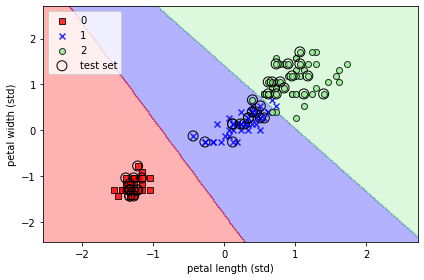

<Figure size 1008x1008 with 0 Axes>

In [ ]:
#  SVM 處理最大化分類邊界
from  sklearn.svm import SVC
svm = SVC(kernel = 'linear', C= 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, 
                      y = y_combined, 
                      classifier = logistics,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.figure(figsize=(14,14))
plt.show()


X_xor [[-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]] 

y_xor(orig) [False  True  True  True  True False  True False False] 

y_xor(new) [-1  1  1  1  1 -1  1 -1 -1] 



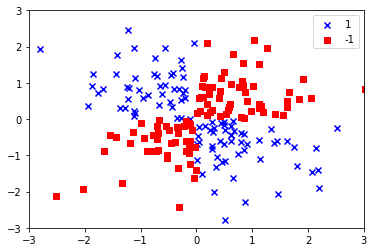

[[-0.03536792  2.11060505]
 [-0.52817175 -1.07296862]
 [-0.52817175 -1.07296862]
 [-0.52817175 -1.07296862]
 [-0.52817175 -1.07296862]
 [-0.03536792  2.11060505]
 [-0.52817175 -1.07296862]
 [-0.03536792  2.11060505]
 [-0.03536792  2.11060505]] 

[ 1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1
 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1
 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1
  1 -1 -1  1  1  1  1  1]


In [ ]:
# SVM 處理非線性分離數據 (kernelized 核心化)
# XOR (Numpy logical_or 亂數邏輯閘產生數據)
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1) #產生一組generator使資料隨機可預測
X_xor = np.random.randn(200, 2) #設定維度並回傳常態分佈樣本([xxx,xxx]*200)
print('X_xor',X_xor[1:10],'\n')
y_xor = np.logical_xor(X_xor[:,0] >0,
                       X_xor[:,1] >0) #只要[a,b]其一 >0 return true
print('y_xor(orig)',y_xor[1:10],'\n')
y_xor = np.where(y_xor, 1, -1)
print('y_xor(new)',y_xor[1:10],'\n')
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c='b', marker = 'x',
            label= '1')
plt.scatter(X_xor[y_xor == -1,0],
            X_xor[y_xor == -1,1],
            c='r', marker = 's',
            label= '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc= 'best')
plt.show()


print(X_xor[y_xor][1:10],'\n')
print(y_xor)

-3.79308500014654 4.030857112372031


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


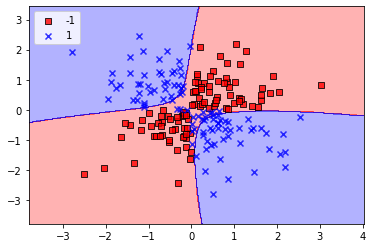

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # print(X)
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    print(x1_min, x1_max)
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # print(x2_min, x2_max)

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    c="",
                    edgecolor='black',
                    marker='o',
                    s = 100,
                    label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0 7.9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


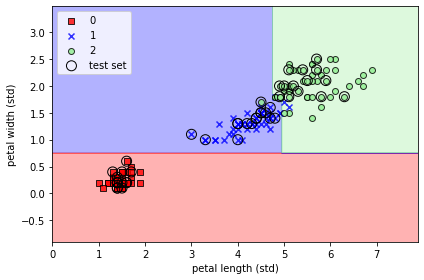

In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier(criterion = 'gini',
                            max_depth = 4,
                            random_state=1)
rf.fit(X_train,y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, 
                      y = y_combined, 
                      classifier = rf,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0 7.9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


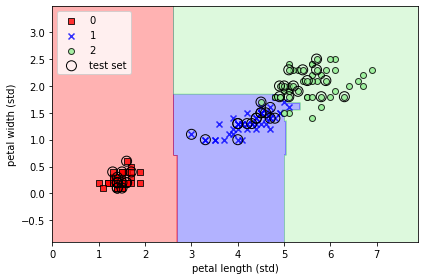

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini',
                            n_estimators = 25,
                            random_state = 1,
                            n_jobs=2)
rf.fit(X_train,y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, 
                      y = y_combined, 
                      classifier = rf,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0 7.9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


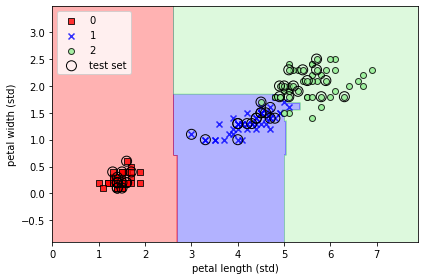

In [ ]:
# DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsClassifier()

KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(X_train,y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, 
                      y = y_combined, 
                      classifier = rf,
                      test_idx = range(105,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()